# Example for the Dark Machines Collider Unsupervised Challenge
This notebook examines how plots will be made for analyzing the results of the challenge.

Notebook author: Bryan Ostdiek (bostdiek at g.harvard.edu)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import matplotlib.markers as mmark

In [2]:
print(f'Using numpy version {np.version.version}: known to work with 1.19.1')
print(f'Using pandas version {pd.__version__}: known to work with 1.1.1')

Using numpy version 1.17.3: known to work with 1.19.1
Using pandas version 1.2.3: known to work with 1.1.1


In [3]:
plt.rcParams.update({'font.family': 'cmr10',
                     'font.size': 12,
                     'axes.unicode_minus': False,
                     'axes.labelsize': 12,
                     'axes.labelsize': 12,
                     'figure.figsize': (4, 4),
                     'figure.dpi': 160,
                     'mathtext.fontset': 'cm',
                     'mathtext.rm': 'serif',
                     'xtick.direction': 'in',
                     'ytick.direction': 'in',
                     'xtick.top': True,
                     'ytick.right': True
                     })

# Load a file

In [4]:
df = pd.read_csv('../data/Combined.csv')

In [5]:
df.head()

,Signal,Model,Chan,AUC,1e-2,1e-3,1e-4
0,stop2b1000_neutralino300,Combined-AND-DeepSVDD_MSE-Flow,1,0.95,0.67,0.43,0.27
1,stop2b1000_neutralino300,Combined-OR-DeepSVDD_MSE-Flow,1,0.98,0.65,0.05,0.01
2,stop2b1000_neutralino300,Combined-PROD-DeepSVDD_MSE-Flow,1,0.17,0.15,0.08,0.00
3,stop2b1000_neutralino300,Combined-AVG-DeepSVDD_MSE-Flow,1,0.98,0.77,0.48,0.24
4,glgl1400_neutralino1100,Combined-AND-DeepSVDD_MSE-Flow,1,0.77,0.22,0.08,0.04


Print of all of the unique model names for the file

In [6]:
list(df['Model'].unique())

['Combined-AND-DeepSVDD_MSE-Flow',
 'Combined-OR-DeepSVDD_MSE-Flow',
 'Combined-PROD-DeepSVDD_MSE-Flow',
 'Combined-AVG-DeepSVDD_MSE-Flow',
 'Combined-AND-VAE_beta1_z21-Flow',
 'Combined-OR-VAE_beta1_z21-Flow',
 'Combined-PROD-VAE_beta1_z21-Flow',
 'Combined-AVG-VAE_beta1_z21-Flow']

# Make a box-and-whiskers plot

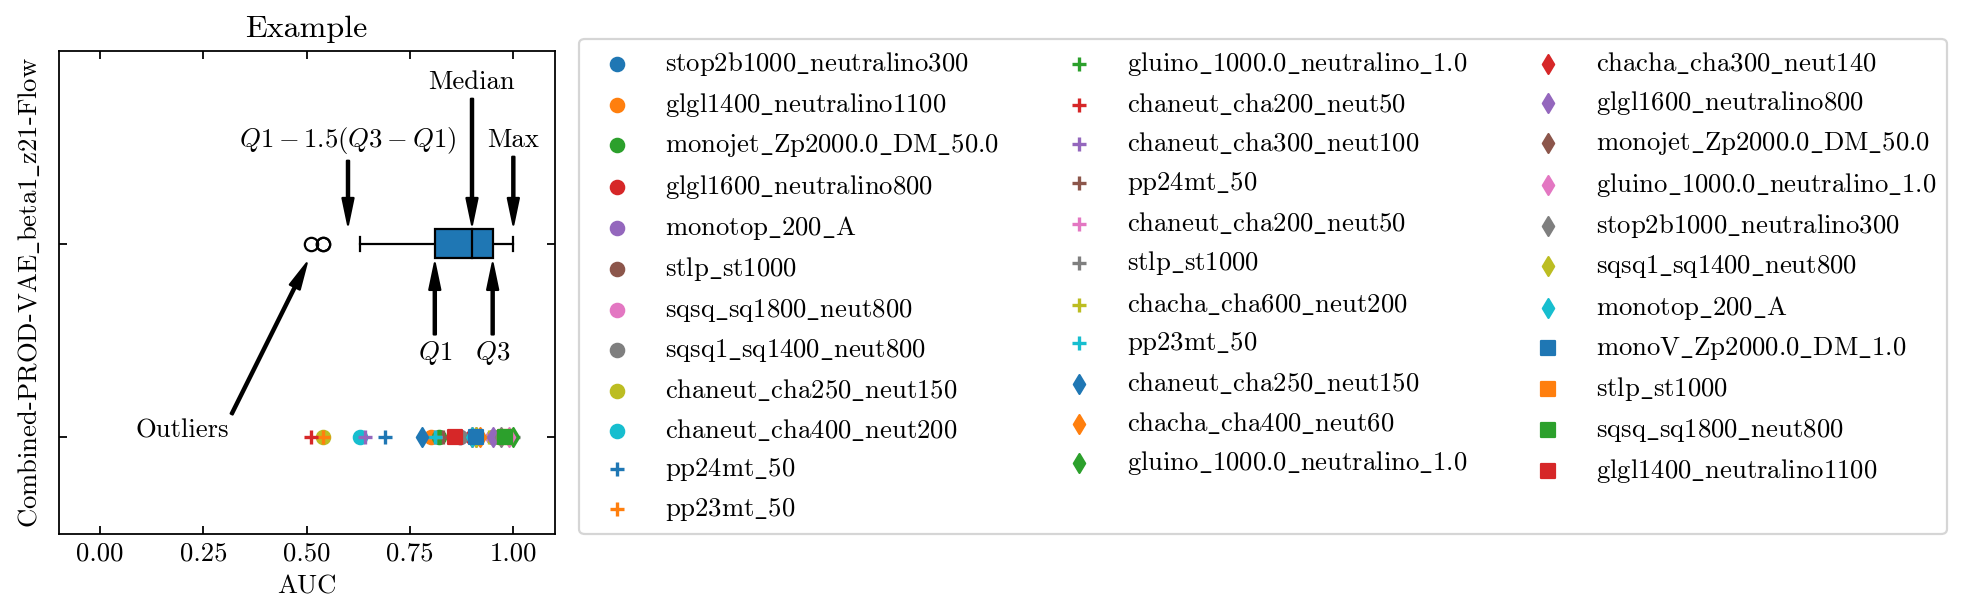

In [7]:
model = 'Combined-PROD-VAE_beta1_z21-Flow'
aucs = list(df[df.Model == model]['AUC'])
sig = list(df[df.Model == model]['Signal'])
shape_dict = {0: 'o',
              1: '+',
              2: 'd',
              3: 's'
             }
for i, auc in enumerate(aucs):
    ic = i % 10
    markern = i // 10
    plt.scatter([auc], [1], c=f'C{i}', marker=shape_dict[markern], label=sig[i].replace('_', r'$\_$'))
    plt.legend(ncol=3, loc=(1.05,  0))
    
bbox1 = plt.boxplot(aucs,
                    vert=False,
                    manage_ticks=False,
                    patch_artist=True,
                    medianprops={'color':'k'},
                    positions=[2]
                   )

plt.ylim(0.5, 3)
plt.yticks([1, 2], [])
plt.xlim(-0.1, 1.1)
plt.xlabel('AUC')
plt.xticks([0, 0.25, 0.5, 0.75, 1])
q1 = np.quantile(aucs, 0.25)
q3 = np.quantile(aucs, 0.75)
qm = q1 - 1.5*(q3-q1)
plt.annotate('Median', (np.median(aucs), 2.1), (np.median(aucs), 2.8), arrowprops=dict(facecolor='black', width=1, headwidth=5), ha='center')
plt.annotate('$Q1$', (np.quantile(aucs, 0.25), 1.9), (np.quantile(aucs, 0.25), 1.4), arrowprops=dict(facecolor='black', width=1, headwidth=5), ha='center')
plt.annotate('$Q3$', (np.quantile(aucs, 0.75), 1.9), (np.quantile(aucs, 0.75), 1.4), arrowprops=dict(facecolor='black', width=1, headwidth=5), ha='center')

plt.annotate('Max', (np.max(aucs), 2.1), (np.max(aucs), 2.5), arrowprops=dict(facecolor='black', width=1, headwidth=5), ha='center')
plt.annotate(r'$Q1 - 1.5 (Q3-Q1)$', (qm, 2.1), (qm, 2.5), arrowprops=dict(facecolor='black', width=1, headwidth=5), ha='center')
plt.annotate('Outliers', (0.5, 1.9), (0.2, 1.), arrowprops=dict(facecolor='black', width=1, headwidth=5), ha='center')


plt.ylabel(model.replace('_','$\_$'))
plt.title('Example')

plt.savefig('../figures/ExampleBoxPlot.pdf', bbox_inches='tight')
plt.savefig('../figures/ExampleBoxPlot.png', bbox_inches='tight')
plt.show()
